Linear Regression

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("../data/fundamentals/NBA.csv")
data.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


In [5]:
db = data[["mp", "win_rating"]]
db.head()

,mp,win_rating
0,2409,1.643091
1,2708,10.808427
2,2407,3.054773
3,585,0.230004
4,2056,0.905614


In [15]:
db.describe()

,mp,win_rating
count,4000.000000,4000.000000
mean,1379.898500,2.044921
std,998.745215,3.473775
min,0.000000,-5.428715
25%,476.000000,-0.101300
50%,1269.000000,0.626639
75%,2155.000000,3.233072
max,4270.000000,26.666873


In [16]:
db.isnull()

,mp,win_rating
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3995,False,False
3996,False,False
3997,False,False
3998,False,False


In [19]:
db.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Length: 4000, dtype: bool

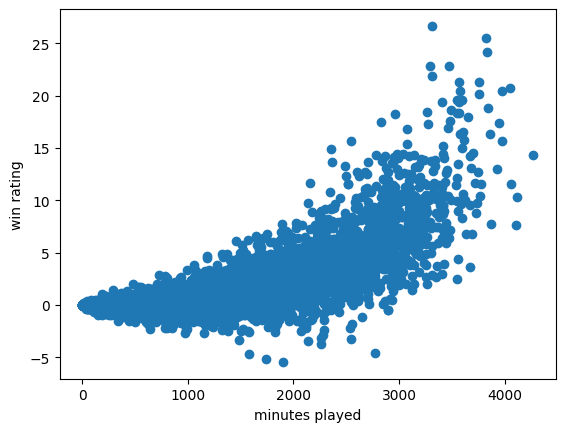

In [7]:
plt.scatter(db['mp'], db['win_rating'])

plt.xlabel('minutes played')
plt.ylabel('win rating')

plt.show()

In [21]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(db[['mp']], db[['win_rating']], test_size=0.3, random_state=42)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5478050400866874

In [22]:
X = db[['mp']]
y = db['win_rating']

cv_results = cross_validate(model, X, y, cv=5)

print(cv_results['test_score'])

cv_results['test_score'].mean()

[0.5555057  0.53447908 0.53790391 0.57658459 0.57917762]


np.float64(0.556730180006891)

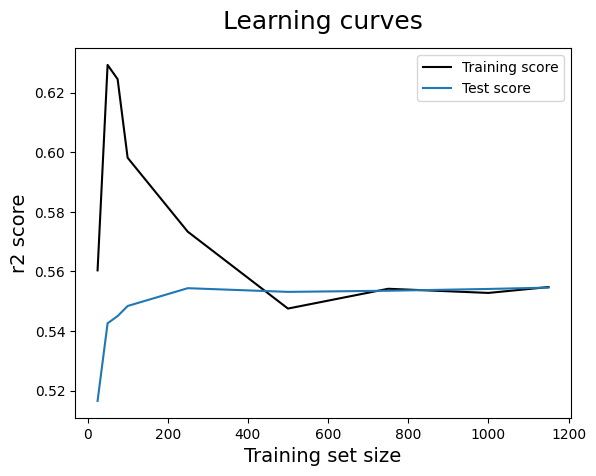

In [24]:
train_sizes = [25,50,75,100,250,500,750,1000,1150]

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score', color='black')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()
plt.show()